In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [4]:
data = pd.read_csv("/content/imdb_top_1000.csv")

#Data Cleaning of 1000 movies

In [5]:
# No. of movies listed in the data
row = data.shape[0]
print(row)


1000


In [6]:
# Checking of Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
# fix the Certificate line items issue. replacing blank cell with R
data["Certificate"] = data["Certificate"].fillna("R")

certificate_count = data["Certificate"].value_counts()
print(certificate_count)


Certificate
R           247
U           234
A           197
UA          175
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64


In [8]:
# fix the Meta score/ Gross line items issue. replacing blank cell with mean value
data["Meta_score"] = data["Meta_score"].fillna(np.mean)
data["Gross"] = data["Gross"].fillna(np.mean)

#Data Sorting and Visualization

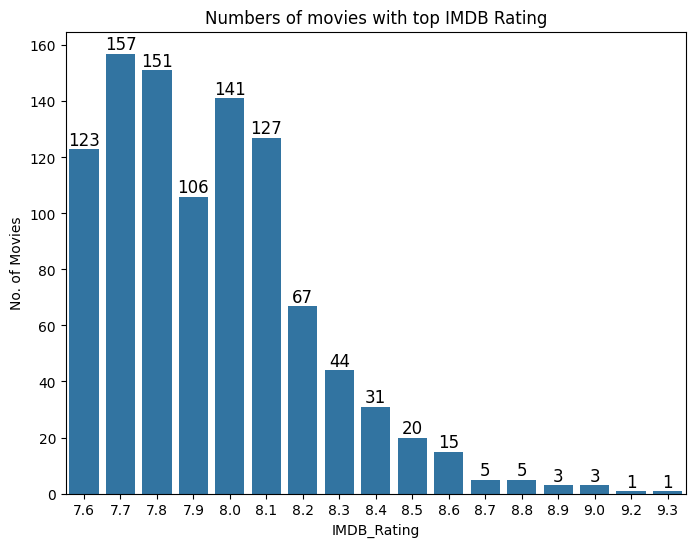

In [9]:
# IMDB rating wise Bar chart
Rating_Counts = data["IMDB_Rating"].value_counts()

plt.figure(figsize=(8,6))
plt.title("Numbers of movies with top IMDB Rating")
ax = sns.barplot(x=Rating_Counts.index, y=Rating_Counts.values)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.xlabel("IMDB_Rating")
plt.ylabel("No. of Movies")
plt.show()

In [10]:
# No of A, U, UA, U/A, Unrated in which years

data["Released_Year"] = data["Released_Year"].replace("PG", 1995)

data["Released_Year"] = pd.to_numeric(data["Released_Year"], errors ='coerce')


bins = range(int(data["Released_Year"].min()), int(data["Released_Year"].max()) + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Create labels like '1990-1999', '2000-2009', etc.


# Bin the 'Year' column
data['Year_Binned'] = pd.cut(data['Released_Year'], bins=bins, labels=labels, right=False)



table = data.pivot_table(index="Year_Binned", columns="Certificate", aggfunc="size", fill_value=0, observed=False)

styled_pivot = table.style.set_caption("Number of Movies by Certificate and Year Bin")\
                                .set_table_styles([{'selector': 'thead th',
                                                    'props': [('background-color', 'lightblue'),
                                                              ('font-weight', 'bold')]}])



display(styled_pivot)

Certificate,16,A,Approved,G,GP,PG,PG-13,Passed,R,TV-14,TV-MA,TV-PG,U,U/A,UA,Unrated
Year_Binned,,,,,,,,,,,,,,,,
1920-1929,0,0,0,0,0,0,0,7,4,0,0,0,0,0,0,0
1930-1939,0,0,1,2,0,2,0,7,7,0,0,2,3,0,0,0
1940-1949,0,1,4,1,0,3,0,10,11,0,0,0,4,0,1,0
1950-1959,0,8,5,2,0,3,2,7,16,0,0,0,13,0,0,0
1960-1969,0,23,1,2,1,2,1,3,19,0,0,0,21,0,0,0
1970-1979,0,26,0,2,1,13,0,0,10,0,0,0,19,0,5,0
1980-1989,0,19,0,0,0,2,2,0,12,0,0,0,41,0,13,0
1990-1999,0,37,0,2,0,5,3,0,40,0,0,0,43,0,21,0
2000-2009,0,39,0,1,0,2,20,0,79,0,0,1,46,0,48,1


In [23]:
# line chart of cerificate and years

certificate_of_most_IMDB = ["A", "PG-13", "R", "U", "UA"]
Extracted_data = table[certificate_of_most_IMDB].copy()

Extracted_data["Total"] = Extracted_data.sum(axis=1)

display(Extracted_data)


Certificate,A,PG-13,R,U,UA,Total
Year_Binned,,,,,,
1920-1929,0,0,4,0,0,4
1930-1939,0,0,7,3,0,10
1940-1949,1,0,11,4,1,17
1950-1959,8,2,16,13,0,39
1960-1969,23,1,19,21,0,64
1970-1979,26,0,10,19,5,60
1980-1989,19,2,12,41,13,87
1990-1999,37,3,40,43,21,144
2000-2009,39,20,79,46,48,232


#Observations:

1. Most Common Certificates: You can see how certificates like 'U' (Universal) were more prevalent in earlier decades, while certificates like 'R' and 'PG-13' became more common in later years.
2. Trends Over Decades: There is a noticeable increase in the number of movies per decade, especially in the 2000-2009 and 2010-2019 periods.
3. Increased Specialization: From the 1980s onward, there has been a shift towards more specific age categories, such as 'PG-13' and 'R' ratings.